# Analysis of the Reddit 2011 User Survey 

and Prediction of "Marital Status" among reddit users

In [61]:
import pandas as pd
import numpy as np

In [62]:
survey_file = "F:/Reddit/RedditShortDemoSurvey-1-Cleaned.csv"

In [63]:
data = pd.read_csv(survey_file)

In [64]:
data

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning: deleting columns

Some columns are not needed because are uninformative ("Entry Id") or redundant ("US States")

In [65]:
data.drop(["Entry Id", "(For U. S. redditors) In which state do you live?"], axis=1, inplace=True)

A summary of the columns

In [66]:
data.describe()

,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
count,32754,32754,32754,32754,32754,32754,32754,32754,32754,28419,32752,32754,3,3,1,1,1,1
unique,3,8,7,7,3,3,8,440,9,1833,7,17,3,2,1,1,1,1
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,United States,"Under $20,000",askreddit,I like dogs.,Other,7/13/11 15:47,public,I like cats.,Other,7/14/11 13:22,public
freq,26418,15802,10428,14814,30526,27488,11046,20967,7892,2123,17149,6562,1,2,1,1,1,1


'Unnamed' columns have only one or three values, and 'treated subreddit data' have too many distinct values and too many missing values

In [67]:
data.drop(["treated subreddit data", 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'], axis=1, inplace=True)

A summary of the remaining columns

In [68]:
data.describe()

,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,Which one of the following ranges includes your total yearly household income before taxes?,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"
count,32754,32754,32754,32754,32754,32754,32754,32754,32754,32752,32754
unique,3,8,7,7,3,3,8,440,9,7,17
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,United States,"Under $20,000",I like dogs.,Other
freq,26418,15802,10428,14814,30526,27488,11046,20967,7892,17149,6562


### Data Cleaning: Aggregating all Countries to their Continents

Using "Python: Get countries by continent from Wikipedia" 
    by Uli Köhler
https://techoverflow.net/blog/2013/12/13/python-get-countries-by-continent-from-wikipedia/

In [69]:
"""
Extract a list of countries, grouped by continent, from Wikipedia
"""
__copyright__ = "Copyright (c) 2015 Uli Köhler"
__license__ = "Apache License v2.0"
__version__ = "1.1"

try:
    import urllib.request as urllib2
except ImportError:
    import urllib2
import re

def downloadWikipediaCountryList():
    """Downloads the wikipedia country list in wikitext format"""
    url = "http://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependent_territories_by_continent?action=raw"
    wikitext = urllib2.urlopen(url).read().decode("utf-8")
    return wikitext.split("\n")

def splitListAtIndices(theList, indices):
    """
    Split a list at a given set of indices
    >>> splitListAtIndices([1,3,5,7,9], [0, 3])
    [[], [1, 3, 5], [7, 9]]
    """
    return [theList[i:j] for i, j in zip([0] + indices, indices + [None])]

def extractContinents(wikitextLines):
    """Given a wikitext-format line list, extracts the lines that belong to a continent for each continent"""
    continentRegex = re.compile("===(\w+\s*\w*)===")
    #Generate list of (lines index, continent) tuples
    continents = [(idx, continentRegex.match(line).group(1))
                  for idx, line in enumerate(wikitextLines) if continentRegex.match(line)]
    continentLines = splitListAtIndices(wikitextLines, [continent[0] for continent in continents])[1:]
    return {continents[i][1]: continentLines[i] for i in range(len(continents))}

countryRegex = re.compile("\| '+\[?\[?([^\]]+)\]?\]?\'+")
def findCountry(line):
    """
    >>> findCountry("| '''[[Germany]]'''")
    'Germany'
    >>> findCountry("| [[Berlin]]")
    """
    match = countryRegex.match(line)
    if match:
        country = match.group(1)
        if "De facto" in country:
            return None
        if "|" in country:
            return country.partition("|")[2]
        return country
    return None

def extractCountries(linesByContinent):
    return {continent: [findCountry(line) for line in continentLines if findCountry(line)]
            for continent, continentLines in linesByContinent.items()}

def getCountriesFromWikipedia():
    lines = downloadWikipediaCountryList()
    linesByContinent = extractContinents(lines)
    return extractCountries(linesByContinent)

def extractContinentofCountries(linesByContinent):
    continentofCountry = {}
    for continent, continentLines in linesByContinent.items():
        for line in continentLines:
            country = findCountry(line) 
            if country:
                continentofCountry[country] = continent
    return continentofCountry

def getCountriesWithContinentFromWikipedia():
    lines = downloadWikipediaCountryList()
    linesByContinent = extractContinents(lines)
    return extractContinentofCountries(linesByContinent)

In [70]:
countries = getCountriesWithContinentFromWikipedia()

In [71]:
countries

{u"'": u'Europe',
 u'Abkhazia': u'Asia',
 u'Afghanistan': u'Asia',
 u'Akrotiri and Dhekelia': u'Asia',
 u'Albania': u'Europe',
 u'Algeria': u'Africa',
 u'American Samoa': u'Oceania',
 u'Andorra': u'Europe',
 u'Angola': u'Africa',
 u'Anguilla': u'North America',
 u'Antigua and Barbuda': u'North America',
 u'Argentina': u'South America',
 u'Armenia': u'Asia',
 u'Aruba': u'North America',
 u'Ashmore and Cartier Islands': u'Oceania',
 u'Australia': u'Oceania',
 u'Austria': u'Europe',
 u'Azerbaijan': u'Asia',
 u'Bahamas': u'North America',
 u'Bahrain': u'Asia',
 u'Baker Island': u'Oceania',
 u'Bangladesh': u'Asia',
 u'Barbados': u'North America',
 u'Belarus': u'Europe',
 u'Belgium': u'Europe',
 u'Belize': u'North America',
 u'Benin': u'Africa',
 u'Bermuda': u'North America',
 u'Bhutan': u'Asia',
 u'Bolivia': u'South America',
 u'Bonaire': u'North America',
 u'Bosnia and Herzegovina': u'Europe',
 u'Botswana': u'Africa',
 u'Bouvet Island': u'Antarctica',
 u'Brazil': u'South America',
 u'Briti

In [72]:
countries["United States"] = u'North America'

In [73]:
data["Continent"] = data["Treated country data"].apply(
    lambda c: countries[c] if (c in countries) else "None")

In [74]:
data[["Treated country data", "Continent"]]

,Treated country data,Continent
0,United States,North America
1,United States,North America
2,United States,North America
3,United States,North America
4,United States,North America
5,United States,North America
6,Germany,Europe
7,United States,North America
8,United States,North America
9,Germany,Europe


In [75]:
data.drop(["Treated country data"], axis=1, inplace=True)

In [76]:
data.describe()

,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Which one of the following ranges includes your total yearly household income before taxes?,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Continent
count,32754,32754,32754,32754,32754,32754,32754,32754,32752,32754,32754
unique,3,8,7,7,3,3,8,9,7,17,7
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,"Under $20,000",I like dogs.,Other,North America
freq,26418,15802,10428,14814,30526,27488,11046,7892,17149,6562,24122


### Data Cleaning: Handling Missing Data

In [77]:
for column in data.columns:
    print "- %s : %s" % (column, pd.unique(data[column]))

- Please indicate your gender. : ['Male' 'Female' 'None']
- Please select the category that includes your age. : ['25-34' '18-24' '35-44' '45-54' 'Under 18' '55-64' '65 or Above' 'None']
- What is your marital status? : ['Blank' 'Married/civil union/domestic partnership' 'In a relationship'
 'Forever Alone' 'Single' 'Engaged' 'Widowed']
- What best describes your employment status? : ['Employed full time' 'Freelance' 'Not employed, but looking for work'
 'Not employed and not looking for work' 'Student' 'None' 'Retired']
- Are you or have you ever been in military service? : ['none' 'No' 'Yes']
- Do you currently have children under the age of 18 living in your household? : ['No' 'Yes' 'None']
- What best describes your level of education? : ["Bachelor's degree" 'Some college' 'High school graduate or equivalent'
 'Graduate or professional degree' 'Trade or Vocational degree'
 'Associate degree' 'Some high school' 'None']
- Which one of the following ranges includes your total yearly h

Missing data is 'None', 'Blank' or 'none'. Pandas can do attribution of missing data, but expect NaNs

Replacing values with NaN

In [78]:
data = data.replace('None', np.nan)
data = data.replace('none', np.nan)
data = data.replace('Blank', np.nan)

Replacing NaNs with the mode of the column

In [79]:
from scipy.stats import mode
for column in data.columns:
    data[column].fillna(mode(data[column]).mode[0], inplace=True)

In [80]:
for column in data.columns:
    print "- %s : %s" % (column, pd.unique(data[column]))

- Please indicate your gender. : ['Male' 'Female']
- Please select the category that includes your age. : ['25-34' '18-24' '35-44' '45-54' 'Under 18' '55-64' '65 or Above']
- What is your marital status? : ['Single' 'Married/civil union/domestic partnership' 'In a relationship'
 'Forever Alone' 'Engaged' 'Widowed']
- What best describes your employment status? : ['Employed full time' 'Freelance' 'Not employed, but looking for work'
 'Not employed and not looking for work' 'Student' 'Retired']
- Are you or have you ever been in military service? : ['No' 'Yes']
- Do you currently have children under the age of 18 living in your household? : ['No' 'Yes']
- What best describes your level of education? : ["Bachelor's degree" 'Some college' 'High school graduate or equivalent'
 'Graduate or professional degree' 'Trade or Vocational degree'
 'Associate degree' 'Some high school']
- Which one of the following ranges includes your total yearly household income before taxes? : ['$150,000 or more

There are still some weird values in 'Are you a dog or a cat person?' and in 'If you were a cheese, what cheese would you be?'

In [81]:
data["Are you a dog or a cat person?"] = data["Are you a dog or a cat person?"].replace('askreddit', np.nan)
data["Are you a dog or a cat person?"] = data["Are you a dog or a cat person?"].replace('movies', np.nan)
data["Are you a dog or a cat person?"] = data["Are you a dog or a cat person?"].replace(' Reddit.com', np.nan)

In [82]:
data["Are you a dog or a cat person?"].fillna(mode(data["Are you a dog or a cat person?"]).mode[0], inplace=True)

In [86]:
data["If you were a cheese, what cheese would you be?"] = data["If you were a cheese, what cheese would you be?"].replace('1', np.nan)
data["If you were a cheese, what cheese would you be?"] = data["If you were a cheese, what cheese would you be?"].replace(' awww', np.nan)
data["If you were a cheese, what cheese would you be?"] = data["If you were a cheese, what cheese would you be?"].replace(' f7u12', np.nan)
data["If you were a cheese, what cheese would you be?"] = data["If you were a cheese, what cheese would you be?"].replace("programming')", np.nan)
data["If you were a cheese, what cheese would you be?"] = data["If you were a cheese, what cheese would you be?"].replace(' Pics', np.nan)

In [87]:
data["If you were a cheese, what cheese would you be?"].fillna(mode(data["If you were a cheese, what cheese would you be?"]).mode[0], inplace=True)

In [88]:
for column in data.columns:
    print "- %s : %s" % (column, pd.unique(data[column]))

- Please indicate your gender. : ['Male' 'Female']
- Please select the category that includes your age. : ['25-34' '18-24' '35-44' '45-54' 'Under 18' '55-64' '65 or Above']
- What is your marital status? : ['Single' 'Married/civil union/domestic partnership' 'In a relationship'
 'Forever Alone' 'Engaged' 'Widowed']
- What best describes your employment status? : ['Employed full time' 'Freelance' 'Not employed, but looking for work'
 'Not employed and not looking for work' 'Student' 'Retired']
- Are you or have you ever been in military service? : ['No' 'Yes']
- Do you currently have children under the age of 18 living in your household? : ['No' 'Yes']
- What best describes your level of education? : ["Bachelor's degree" 'Some college' 'High school graduate or equivalent'
 'Graduate or professional degree' 'Trade or Vocational degree'
 'Associate degree' 'Some high school']
- Which one of the following ranges includes your total yearly household income before taxes? : ['$150,000 or more

In [89]:
data.describe()

,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Which one of the following ranges includes your total yearly household income before taxes?,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Continent
count,32754,32754,32754,32754,32754,32754,32754,32754,32754,32754,32754
unique,2,7,6,6,2,2,7,8,3,11,6
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,"Under $20,000",I like dogs.,Other,North America
freq,26619,15890,10433,14965,30531,27707,11190,9507,17160,6573,25420


## Visualizing the distributions of variables

In [104]:
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 6)

In [93]:
%matplotlib inline

In [95]:
data.columns

Index([u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?', u'Continent'],
      dtype='object')

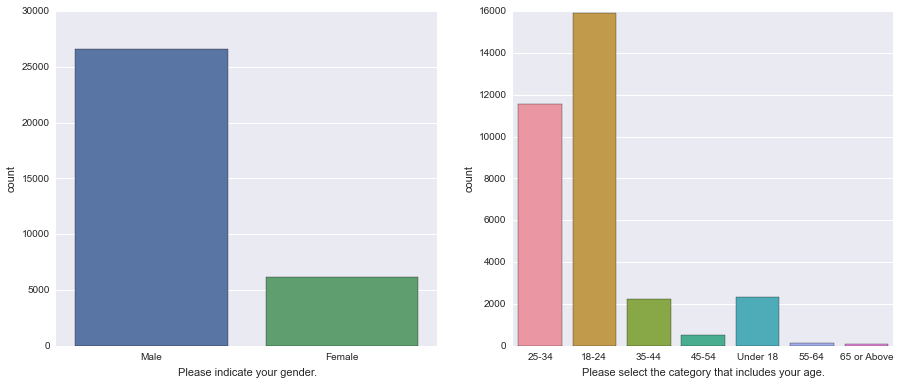

In [105]:
mpl.pyplot.subplot(1,2,1)
sns.countplot(x="Please indicate your gender.", data=data);
mpl.pyplot.subplot(1,2,2)
sns.countplot(x="Please select the category that includes your age.", data=data);

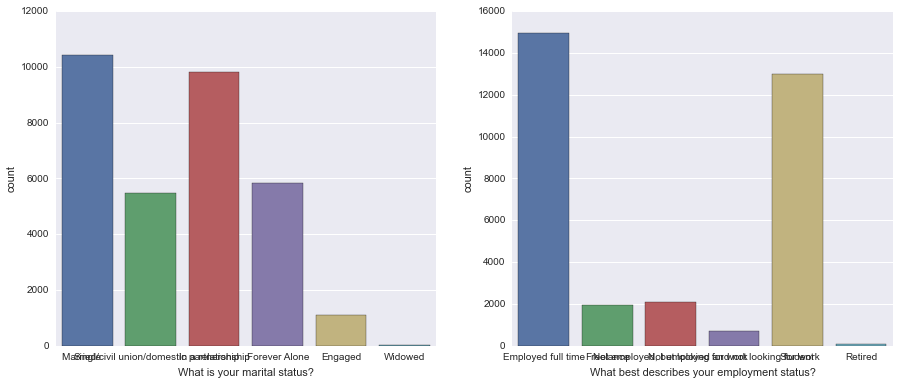

In [106]:
mpl.pyplot.subplot(1,2,1)
sns.countplot(x="What is your marital status?", data=data);
mpl.pyplot.subplot(1,2,2)
sns.countplot(x="What best describes your employment status?", data=data);

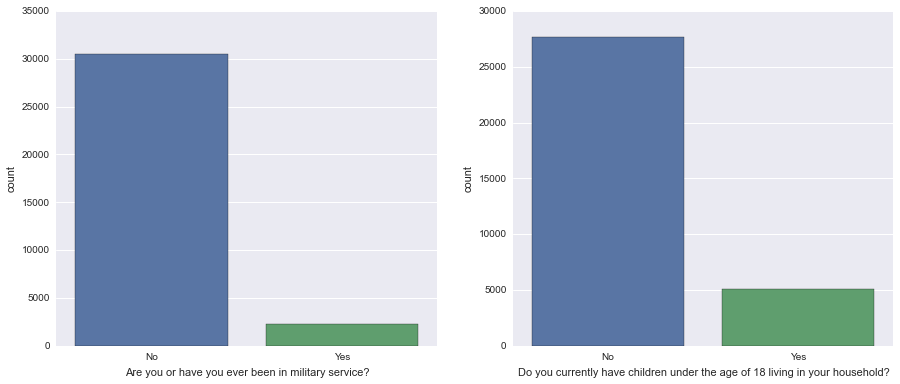

In [107]:
mpl.pyplot.subplot(1,2,1)
sns.countplot(x="Are you or have you ever been in military service?", data=data);
mpl.pyplot.subplot(1,2,2)
sns.countplot(x="Do you currently have children under the age of 18 living in your household?", data=data);

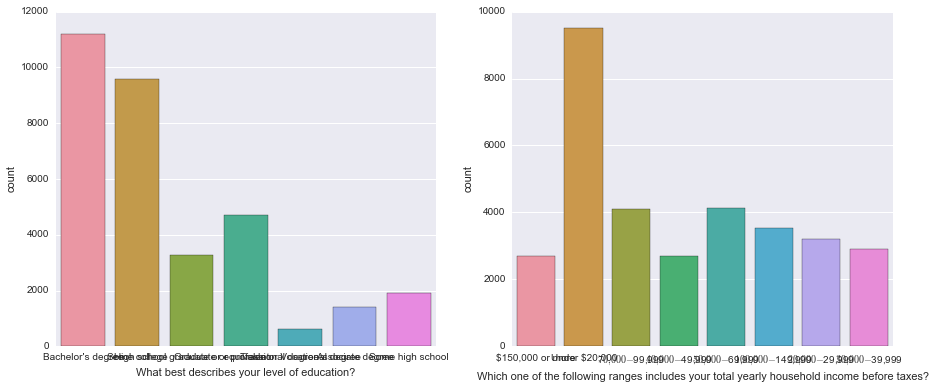

In [108]:
mpl.pyplot.subplot(1,2,1)
sns.countplot(x="What best describes your level of education?", data=data);
mpl.pyplot.subplot(1,2,2)
sns.countplot(x="Which one of the following ranges includes your total yearly household income before taxes?", data=data);

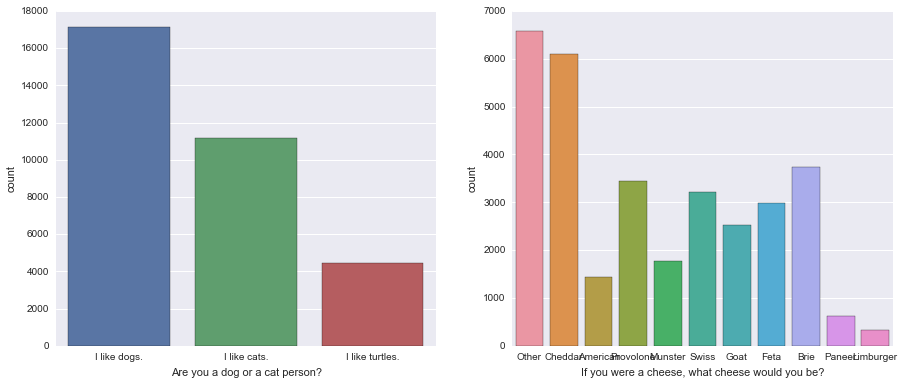

In [109]:
mpl.pyplot.subplot(1,2,1)
sns.countplot(x="Are you a dog or a cat person?", data=data);
mpl.pyplot.subplot(1,2,2)
sns.countplot(x="If you were a cheese, what cheese would you be?", data=data);

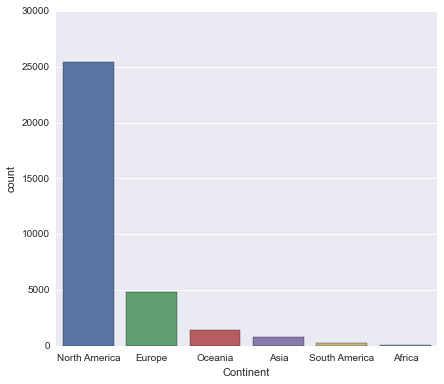

In [110]:
mpl.pyplot.subplot(1,2,1)
sns.countplot(x="Continent", data=data);

## Variable Correlations

### indicator variables

In [111]:
data2 = pd.get_dummies(data)

In [113]:
data2.describe()

,Please indicate your gender._Female,Please indicate your gender._Male,Please select the category that includes your age._18-24,Please select the category that includes your age._25-34,Please select the category that includes your age._35-44,Please select the category that includes your age._45-54,Please select the category that includes your age._55-64,Please select the category that includes your age._65 or Above,Please select the category that includes your age._Under 18,What is your marital status?_Engaged,...,"If you were a cheese, what cheese would you be?_Other","If you were a cheese, what cheese would you be?_Paneer","If you were a cheese, what cheese would you be?_Provolone","If you were a cheese, what cheese would you be?_Swiss",Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
count,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,...,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000
mean,0.187305,0.812695,0.485132,0.353392,0.068908,0.015326,0.004274,0.001832,0.071136,0.033858,...,0.200678,0.018868,0.105453,0.098125,0.003511,0.024272,0.146211,0.776088,0.041857,0.008060
std,0.390162,0.390162,0.499787,0.478030,0.253301,0.122849,0.065239,0.042761,0.257056,0.180868,...,0.400514,0.136061,0.307141,0.297489,0.059151,0.153894,0.353323,0.416870,0.200266,0.089417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Computing the Correlation Matrix

In [114]:
correlation_matrix = data2.corr()

Plotting the Correlation Matrix

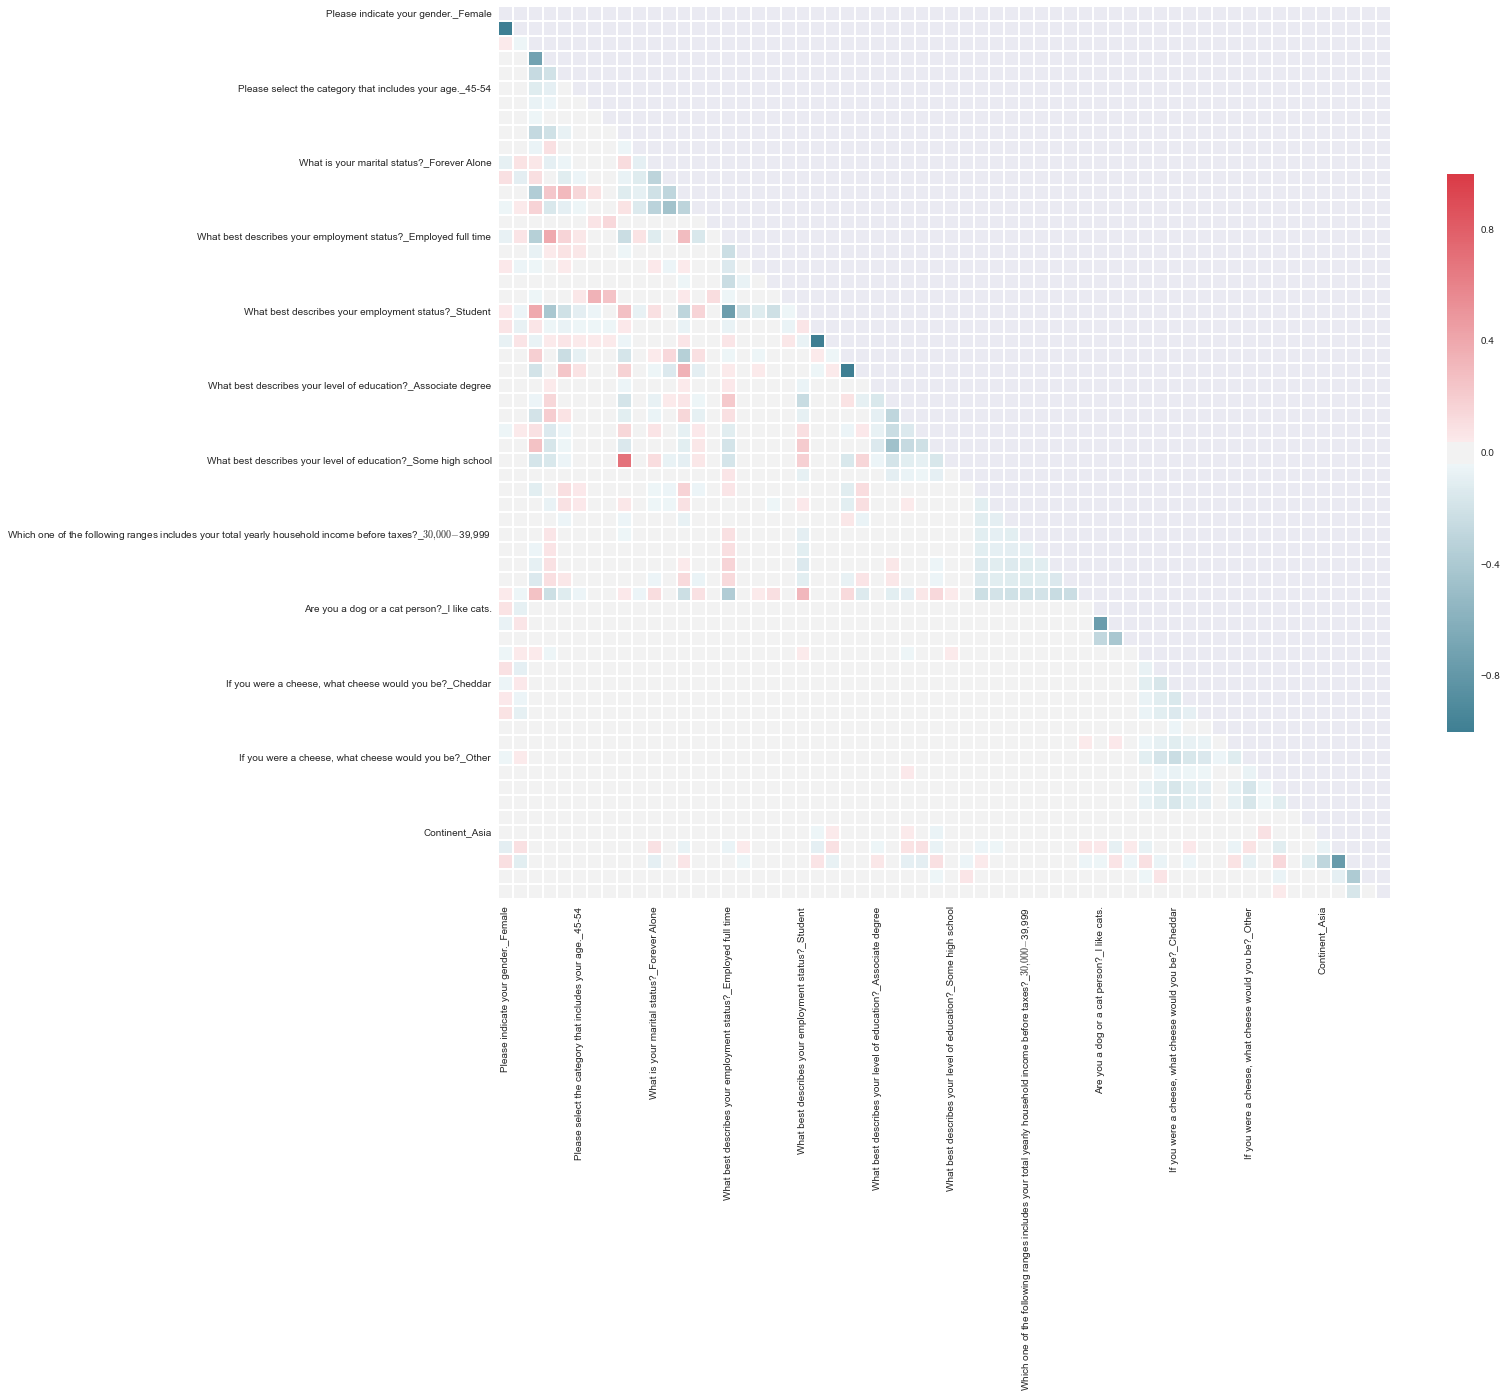

In [118]:
import warnings
warnings.filterwarnings("ignore")
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = mpl.pyplot.subplots(figsize=(20, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

### Searching for the more highly correlated variables

In [121]:
correlation_matrix.loc[:,:] = np.tril(correlation_matrix, k=-1)
print correlation_matrix.stack().order()

Are you or have you ever been in military service?_Yes                                                           Are you or have you ever been in military service?_No                                                           -1.000000
Please indicate your gender._Male                                                                                Please indicate your gender._Female                                                                             -1.000000
Do you currently have children under the age of 18 living in your household?_Yes                                 Do you currently have children under the age of 18 living in your household?_No                                 -1.000000
Continent_North America                                                                                          Continent_Europe                                                                                                -0.770428
Are you a dog or a cat person?_I like dogs.                 

The more correlated variables are:

#### Positive
- 
What best describes your level of education?_Some high school --- Please select the category that includes your age._Under 18: 0.690558

#### Negative
- 
What best describes your employment status?_Student --- Please select the category that includes your age._25-34: 
-0.415915

## Prediction

### Create a random forest model that predicts "Marital Status" based on the remaining variables

In [122]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

Use a grid search to optimize your model hyperparameters

In [135]:
gs = GridSearchCV(RandomForestClassifier(n_jobs=2), 
                      {'n_estimators': [250, 500, 750, 1000], 'max_features': ['auto', 'log2', None]})

Dependent variable y, Independent variables X

In [124]:
y = data['What is your marital status?']
X = pd.get_dummies(data=data[[u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?', u'Continent']])

In [126]:
pd.unique(y)

array(['Single', 'Married/civil union/domestic partnership',
       'In a relationship', 'Forever Alone', 'Engaged', 'Widowed'], dtype=object)

Converting target to binary: In a Relationship or Not

To make easier the prediction task and the metrics analysis

In [130]:
y = (y == 'Married/civil union/domestic partnership') | (y == 'In a relationship') | (y == 'Engaged')

In [133]:
y.head(15)

0     False
1     False
2     False
3     False
4     False
5      True
6      True
7      True
8      True
9      True
10    False
11     True
12    False
13    False
14     True
Name: What is your marital status?, dtype: bool

Separating X_train, X_test, y_train, y_test

In [134]:
from sklearn import cross_validation, metrics
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.1)

Grid Search

In [136]:
gs = gs.fit(X_train, y_train)

Best parameters found by the grid search

In [137]:
gs.best_params_

{'max_features': 'log2', 'n_estimators': 750}

Best accuracy score in the search

In [138]:
gs.best_score_

0.63393038876450236

Getting the best trained random forest

In [139]:
model = gs.best_estimator_

In [140]:
y_pred = model.predict(X_test)

In [141]:
print metrics.classification_report(y_test, y_pred)

             precision    recall  f1-score   support

      False       0.64      0.67      0.65      1631
       True       0.66      0.63      0.64      1645

avg / total       0.65      0.65      0.65      3276



Computing the confussion matrix

In [142]:
print metrics.confusion_matrix(y_test, y_pred)

[[1090  541]
 [ 609 1036]]


Computing the model's AUC using 5 fold cross validation

In [143]:
cv_score = cross_validation.cross_val_score(model, X, y, scoring='roc_auc', cv=5)

In [144]:
cv_score.mean()

0.68344886248228198

### Ploting the ROC curve

Based on http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [145]:
from sklearn.metrics import roc_curve
y_pred = model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)

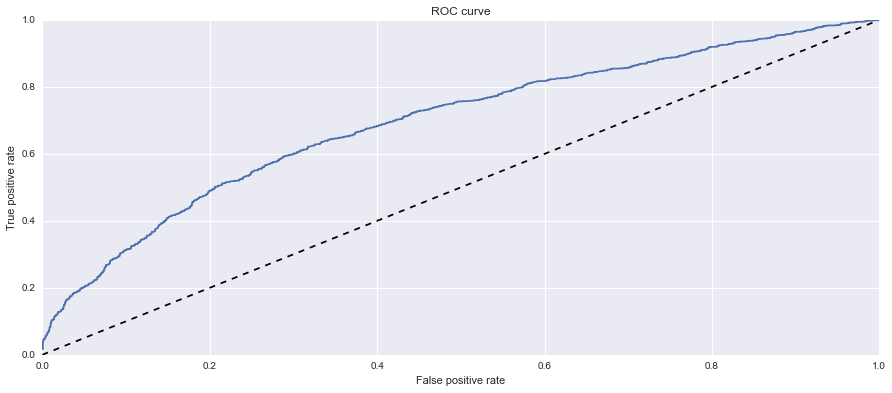

In [147]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()